In [1]:
###########################################################
######################## R kernel #########################
###########################################################

In [1]:
###########################
# load required libraries #
###########################
#install.packages("tidyverse") # data manipulation, exploration and visualization that share a common design philosophy
#install.packages("rjson") # read json files
#install.packages("data.table") # large data sets 
#install.packages("bipartite") # analyses and visualization of bipartite networks
#install.packages("repr") # to change plot size
library("tidyverse")
library("rjson")
library("data.table")
library("bipartite")
library("repr")

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0       ✔ purrr   0.3.1  
✔ tibble  2.0.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.3.1  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘data.table’

The following objects are masked from ‘package:dplyr’:

    between, first, last

The following object is masked from ‘package:purrr’:

    transpose

Loading required package: vegan
Loading required package: permute
Loading required package: lattice
This is vegan 2.5-4
Loading required package: sna
Loading required package: statnet.common

Attaching package: ‘statnet.common’

The following object is masked from ‘package:base’:

    order

Loading required package: network
network: Classes for Relational Data
Version 1.13.0.1 created on 2015-08-31.
copyright (c

In [112]:
################################################################
# download a single ecological network from www.web-of-life.es #
################################################################
networkName <- "M_SD_002"
speciesName <- "yes"
url <- paste("http://www.web-of-life.es/download/",
             networkName,
             "_",
             speciesName,
             ".csv",
             sep = "")
network_adjacency_matrix <- as.matrix(read.csv(file = url, sep = ",",
                                               header = TRUE,
                                               row.names = 1,
                                               check.names = "FALSE"))
# print the network_adjacency_matrix (plants as rows; seed dispersers as columns)
network_adjacency_matrix

,Manucodia keraudrenii,Diphyllodes magnificus,Paradisaea raggiana,Parotia lawesii,Lophorina superba,Manucodia chalybatus,Paradisaea rudolphi,Ptiloris magnificus,Epimachus albertisii
Ficus gul,155,8,45,12,1,25,1,0,0
Homalanthus sp1 M_SD_002,4,104,75,10,17,0,23,8,0
Gastonia sp1 M_SD_002,17,58,24,22,0,0,3,7,0
Ficus odoardi,55,8,20,6,1,19,0,2,0
Chisocheton sp1 M_SD_002,7,13,13,10,23,1,3,16,5
Ficus 275,40,5,13,1,2,8,4,0,0
Schefflera sp1 M_SD_002,0,2,0,47,0,0,10,1,0
Dysoxylum sp1 M_SD_002,1,12,17,1,0,0,0,0,0
Cissus hypoglauca,13,4,5,2,1,0,3,1,1
Endospermum sp1 M_SD_002,2,15,2,2,9,0,0,0,0


In [113]:
#############################################################
# print the list of pairwise interactions from that network #
#############################################################
network_list_edges <- as.data.frame(network_adjacency_matrix) %>%
    rownames_to_column %>%
    gather(key = "seed_disperser", value="interaction", -rowname) %>%
    rename(plant = rowname) %>%
    # remove pairs of species that do not interact (interaction = 0)
    filter(interaction > 0)
network_list_edges

plant,seed_disperser,interaction
Ficus gul,Manucodia keraudrenii,155
Homalanthus sp1 M_SD_002,Manucodia keraudrenii,4
Gastonia sp1 M_SD_002,Manucodia keraudrenii,17
Ficus odoardi,Manucodia keraudrenii,55
Chisocheton sp1 M_SD_002,Manucodia keraudrenii,7
Ficus 275,Manucodia keraudrenii,40
Dysoxylum sp1 M_SD_002,Manucodia keraudrenii,1
Cissus hypoglauca,Manucodia keraudrenii,13
Endospermum sp1 M_SD_002,Manucodia keraudrenii,2
Elmerrillia sp1 M_SD_002,Manucodia keraudrenii,8


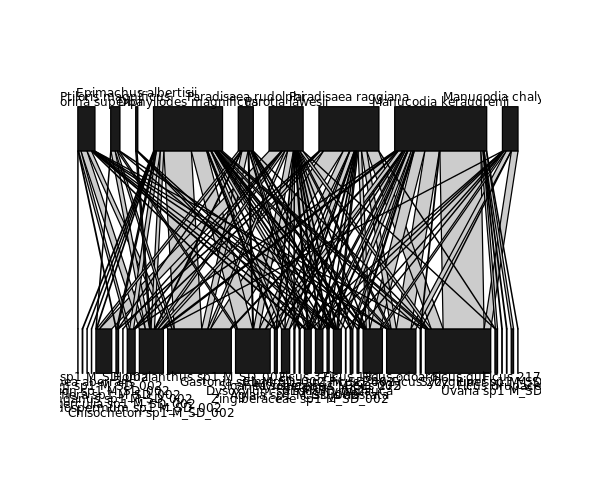

In [114]:
####################
# plot the network #
####################
plotweb(network_adjacency_matrix) # seed dispersers (top) and plants species (bottom)

In [115]:
########################################################################################
# save the adjacency matrix as a txt file (plants as rows; seed dispersers as columns) #
########################################################################################
network_adjacency_matrix[network_adjacency_matrix > 0] <- 1 # from quantitative to binary matrix
write.table(network_adjacency_matrix,
            file = "example_network_M_SD_002.txt",
            sep = " ",
            row.names = FALSE,
            col.names = FALSE)

In [119]:
##################################################################################
# download networks by specifying the type of interaction (plant-seed disperser) #
##################################################################################
# create an empty list to store the networks
network_list <- list()

# type of interaction
    # mutualistic
        # "3" (plant-ant)
        # "5" (plant-pollinator)
        # "6" (plant-seed disperser)
        # "11" (anemone-fish)
    # antagonistic
        # "8" (host-parasite)
        # "10" (plant-herbivore)
        # "7" (food webs)
type_id <- "6"

# create a file (json_networks) with the names of the networks we would like to download
json_file <- paste("http://www.web-of-life.es/networkslist.php?type=",
                   type_id,
                   "&data=All",
                   sep = "")
json_networks <- fromJSON(paste(readLines(json_file),
                                collapse = ""))

# would you like to include the names of the species? ("yes" or "no")
speciesName <- "yes"

# download the networks
for(i in 1: length(json_networks)){
    
    # identifying the network
    #if(json_networks[[i]]$countSpecies > 0) { # we get networks and subnetworks
    if(json_networks[[i]]$root == 0 & is.null(json_networks[[i]]$parentNetworkId)){ # we get networks without subnetworks
        networkName <- json_networks[[i]]$networkName
        print(networkName)

        # building the URL
        url <- paste("http://www.web-of-life.es/download/",
                     networkName,
                     "_",
                     speciesName, ".csv",
                     sep = "")

        # download the network from www.web-of-life.es
        data <- fread(url)

        # storing the networks as a data table
        assign(networkName,data)

        # storing the networks as a list
        network_list[[networkName]] <- (data)
    }
}

Warning message in readLines(json_file):
“incomplete final line found on 'http://www.web-of-life.es/networkslist.php?type=6&data=All'”

[1] "M_SD_001"
[1] "M_SD_002"
[1] "M_SD_003"
[1] "M_SD_004"
[1] "M_SD_005"
[1] "M_SD_006"
[1] "M_SD_007"
[1] "M_SD_008"
[1] "M_SD_009"
[1] "M_SD_010"
[1] "M_SD_011"
[1] "M_SD_012"
[1] "M_SD_013"
[1] "M_SD_014"
[1] "M_SD_015"
[1] "M_SD_016"
[1] "M_SD_017"
[1] "M_SD_018"
[1] "M_SD_019"
[1] "M_SD_020"
[1] "M_SD_021"
[1] "M_SD_022"
[1] "M_SD_023"
[1] "M_SD_024"
[1] "M_SD_025"
[1] "M_SD_026"
[1] "M_SD_027"
[1] "M_SD_028"
[1] "M_SD_029"
[1] "M_SD_030"
[1] "M_SD_031"
[1] "M_SD_032"
[1] "M_SD_033"
[1] "M_SD_034"


In [120]:
# check the number of plant-seed disperser networks stored in the list
number_downloaded_networks <- length(network_list)
number_downloaded_networks

[1] 34

In [ ]:
######################################################################
# the following code is illustrates the process for a single network #
######################################################################

In [124]:
########################################
# print one of the downloaded networks #
########################################
# get it from the data table
#M_SD_002

# get it from the list
#network_list[[2]]
network_list[["M_SD_002"]]

V1,Manucodia keraudrenii,Diphyllodes magnificus,Paradisaea raggiana,Parotia lawesii,Lophorina superba,Manucodia chalybatus,Paradisaea rudolphi,Ptiloris magnificus,Epimachus albertisii
Ficus gul,155,8,45,12,1,25,1,0,0
Homalanthus sp1 M_SD_002,4,104,75,10,17,0,23,8,0
Gastonia sp1 M_SD_002,17,58,24,22,0,0,3,7,0
Ficus odoardi,55,8,20,6,1,19,0,2,0
Chisocheton sp1 M_SD_002,7,13,13,10,23,1,3,16,5
Ficus 275,40,5,13,1,2,8,4,0,0
Schefflera sp1 M_SD_002,0,2,0,47,0,0,10,1,0
Dysoxylum sp1 M_SD_002,1,12,17,1,0,0,0,0,0
Cissus hypoglauca,13,4,5,2,1,0,3,1,1
Endospermum sp1 M_SD_002,2,15,2,2,9,0,0,0,0


In [125]:
###########################################################################################
# convert the values in the first column of one of the downloaded networks into row names #
###########################################################################################
# plant-pollinator (do it only once because it overwrites the network: otherwise, download again the list of networks)
M_SD_002 <- M_SD_002 %>%
    remove_rownames %>%
    column_to_rownames(var="V1")   
M_SD_002

,Manucodia keraudrenii,Diphyllodes magnificus,Paradisaea raggiana,Parotia lawesii,Lophorina superba,Manucodia chalybatus,Paradisaea rudolphi,Ptiloris magnificus,Epimachus albertisii
Ficus gul,155,8,45,12,1,25,1,0,0
Homalanthus sp1 M_SD_002,4,104,75,10,17,0,23,8,0
Gastonia sp1 M_SD_002,17,58,24,22,0,0,3,7,0
Ficus odoardi,55,8,20,6,1,19,0,2,0
Chisocheton sp1 M_SD_002,7,13,13,10,23,1,3,16,5
Ficus 275,40,5,13,1,2,8,4,0,0
Schefflera sp1 M_SD_002,0,2,0,47,0,0,10,1,0
Dysoxylum sp1 M_SD_002,1,12,17,1,0,0,0,0,0
Cissus hypoglauca,13,4,5,2,1,0,3,1,1
Endospermum sp1 M_SD_002,2,15,2,2,9,0,0,0,0


In [126]:
#########################################################################################
# convert network from quantitative to qualitative (i.e., as a binary adjacency matrix) #
#########################################################################################
M_SD_002[M_SD_002 > 0] <- 1
M_SD_002

,Manucodia keraudrenii,Diphyllodes magnificus,Paradisaea raggiana,Parotia lawesii,Lophorina superba,Manucodia chalybatus,Paradisaea rudolphi,Ptiloris magnificus,Epimachus albertisii
Ficus gul,1,1,1,1,1,1,1,0,0
Homalanthus sp1 M_SD_002,1,1,1,1,1,0,1,1,0
Gastonia sp1 M_SD_002,1,1,1,1,0,0,1,1,0
Ficus odoardi,1,1,1,1,1,1,0,1,0
Chisocheton sp1 M_SD_002,1,1,1,1,1,1,1,1,1
Ficus 275,1,1,1,1,1,1,1,0,0
Schefflera sp1 M_SD_002,0,1,0,1,0,0,1,1,0
Dysoxylum sp1 M_SD_002,1,1,1,1,0,0,0,0,0
Cissus hypoglauca,1,1,1,1,1,0,1,1,1
Endospermum sp1 M_SD_002,1,1,1,1,1,0,0,0,0


In [127]:
####################################
# compute some network descriptors #
####################################

# plant-pollinator
plants <- nrow(M_SD_002) # number of rows
plants

animals <- ncol(M_SD_002) # number of columns
animals

interactions <- sum(M_SD_002) # number of interactions
interactions

connectance <- interactions / (plants * animals) # connectance
connectance

[1] 31

[1] 9

[1] 119

[1] 0.4265233

In [132]:
##############################################################################
# download networks by specifying the type of interaction (plant-pollinator) #
##############################################################################
# create an empty list to store the networks
network_list_PL <- list()

# type of interaction
    # mutualistic
        # "3" (plant-ant)
        # "5" (plant-pollinator)
        # "6" (plant-seed disperser)
        # "11" (anemone-fish)
    # antagonistic
        # "8" (host-parasite)
        # "10" (plant-herbivore)
        # "7" (food webs)
type_id <- "5"

# create a file (json_networks) with the names of the networks we would like to download
json_file <- paste("http://www.web-of-life.es/networkslist.php?type=",
                   type_id,
                   "&data=All",
                   sep = "")
json_networks <- fromJSON(paste(readLines(json_file),
                                collapse = ""))

# would you like to include the names of the species? ("yes" or "no")
speciesName <- "yes"

# download the networks
for(i in 1: length(json_networks)){
    
    # identifying the network
    #if(json_networks[[i]]$countSpecies > 0) { # we get networks and subnetworks
    if(json_networks[[i]]$root == 0 & is.null(json_networks[[i]]$parentNetworkId)){ # we get networks without subnetworks
        networkName <- json_networks[[i]]$networkName
        print(networkName)

        # building the URL
        url <- paste("http://www.web-of-life.es/download/",
                     networkName,
                     "_",
                     speciesName, ".csv",
                     sep = "")

        # download the network from www.web-of-life.es
        data <- fread(url)

        # storing the networks as a data table
        assign(networkName,data)

        # storing the networks as a list
        network_list_PL[[networkName]] <- (data)
    }
}

Warning message in readLines(json_file):
“incomplete final line found on 'http://www.web-of-life.es/networkslist.php?type=5&data=All'”

[1] "M_PL_001"
[1] "M_PL_002"
[1] "M_PL_003"
[1] "M_PL_004"
[1] "M_PL_005"
[1] "M_PL_006"
[1] "M_PL_007"
[1] "M_PL_008"
[1] "M_PL_009"
[1] "M_PL_010"
[1] "M_PL_011"
[1] "M_PL_012"
[1] "M_PL_013"
[1] "M_PL_014"
[1] "M_PL_015"
[1] "M_PL_016"
[1] "M_PL_017"
[1] "M_PL_018"
[1] "M_PL_019"
[1] "M_PL_020"
[1] "M_PL_021"
[1] "M_PL_022"
[1] "M_PL_023"
[1] "M_PL_024"
[1] "M_PL_025"
[1] "M_PL_026"
[1] "M_PL_027"
[1] "M_PL_028"
[1] "M_PL_029"
[1] "M_PL_030"
[1] "M_PL_031"
[1] "M_PL_032"
[1] "M_PL_033"
[1] "M_PL_034"
[1] "M_PL_035"
[1] "M_PL_036"
[1] "M_PL_037"
[1] "M_PL_038"
[1] "M_PL_039"
[1] "M_PL_040"
[1] "M_PL_041"
[1] "M_PL_042"
[1] "M_PL_043"
[1] "M_PL_044"
[1] "M_PL_045"
[1] "M_PL_046"
[1] "M_PL_047"
[1] "M_PL_048"
[1] "M_PL_049"
[1] "M_PL_050"
[1] "M_PL_051"
[1] "M_PL_052"
[1] "M_PL_053"
[1] "M_PL_054"
[1] "M_PL_055"
[1] "M_PL_056"
[1] "M_PL_057"
[1] "M_PL_058"
[1] "M_PL_059"
[1] "M_PL_062"
[1] "M_PL_063"
[1] "M_PL_064"
[1] "M_PL_065"
[1] "M_PL_066"
[1] "M_PL_067"
[1] "M_PL_068"
[1] "M_PL_

In [133]:
# check the number of plant-pollinator networks stored on the list
number_downloaded_PL_networks <- length(network_list_PL)
number_downloaded_PL_networks

[1] 68

In [134]:
PL_size <- vector() # initialize vector to store network size
PL_connectance <- vector() # initialize vector to store network connectance

# please, note that network_list_PL[[61]] has an additional column ("Number of flowers"): we have to remove that column
for (i in 1: length(network_list_PL)) {
    
    if(i == 61) {
        current_network <- network_list_PL[[i]] %>%
            remove_rownames %>%
            column_to_rownames(var="V1") %>%
            select(-1)
    }
    else {
        # convert the values in the first column of one of the downloaded network into row names
        current_network <- network_list_PL[[i]] %>%
            remove_rownames %>%
            column_to_rownames(var="V1")   
    }
    # convert network from quantitative to qualitative (i.e., as a binary adjacency matrix)
    current_network[current_network > 0] <- 1

    # compute some network descriptors
    plants <- nrow(current_network) # number of rows
    animals <- ncol(current_network) # number of columns
    interactions <- sum(current_network) # number of interactions
    connectance <- interactions / (plants * animals) # connectance

    # store network size and connectance as vectors
    PL_size[i] <- plants * animals # network size
    PL_connectance[i] <- connectance # connectance
}

In [135]:
# print the data
PL_data <- data.frame(PL_size, PL_connectance)
names(PL_data) <- c("size", "connectance")
PL_data

size,connectance
8484,0.04255068
2752,0.07122093
900,0.09000000
1224,0.13643791
26400,0.03496212
1037,0.14079074
576,0.14756944
418,0.25358852
2832,0.08545198
2356,0.19354839


In [136]:
#####################
### host-parasite ###
#####################

In [137]:
###########################################################################
# download networks by specifying the type of interaction (host-parasite) #
###########################################################################
# create an empty list to store the networks
network_list_HP <- list()

# type of interaction
    # mutualistic
        # "3" (plant-ant)
        # "5" (plant-pollinator)
        # "6" (plant-seed disperser)
        # "11" (anemone-fish)
    # antagonistic
        # "8" (host-parasite)
        # "10" (plant-herbivore)
        # "7" (food webs)
type_id <- "8"

# create a file (json_networks) with the names of the networks we would like to download
json_file <- paste("http://www.web-of-life.es/networkslist.php?type=",
                   type_id,
                   "&data=All",
                   sep = "")
json_networks <- fromJSON(paste(readLines(json_file),
                                collapse = ""))

# would you like to include the names of the species? ("yes" or "no")
speciesName <- "yes"

# download the networks
for(i in 1: length(json_networks)){
    
    # identifying the network
    #if(json_networks[[i]]$countSpecies > 0){ # we get networks and subnetworks
    if(json_networks[[i]]$root == 0 & is.null(json_networks[[i]]$parentNetworkId)) { # we get networks without subnetworks
        networkName <- json_networks[[i]]$networkName
        print(networkName)

        # building the URL
        url <- paste("http://www.web-of-life.es/download/",
                     networkName,
                     "_",
                     speciesName, ".csv",
                     sep = "")

        # download the network from www.web-of-life.es
        data <- fread(url)

        # storing the networks as a data table
        assign(networkName,data)

        # storing the networks as a list
        network_list_HP[[networkName]] <- (data)
    }
}

Warning message in readLines(json_file):
“incomplete final line found on 'http://www.web-of-life.es/networkslist.php?type=8&data=All'”

[1] "A_HP_001"
[1] "A_HP_002"
[1] "A_HP_003"
[1] "A_HP_004"
[1] "A_HP_005"
[1] "A_HP_006"
[1] "A_HP_007"
[1] "A_HP_008"
[1] "A_HP_009"
[1] "A_HP_010"
[1] "A_HP_011"
[1] "A_HP_012"
[1] "A_HP_013"
[1] "A_HP_014"
[1] "A_HP_015"
[1] "A_HP_016"
[1] "A_HP_017"
[1] "A_HP_018"
[1] "A_HP_019"
[1] "A_HP_020"
[1] "A_HP_021"
[1] "A_HP_022"
[1] "A_HP_023"
[1] "A_HP_024"
[1] "A_HP_025"
[1] "A_HP_026"
[1] "A_HP_027"
[1] "A_HP_028"
[1] "A_HP_029"
[1] "A_HP_030"
[1] "A_HP_031"
[1] "A_HP_032"
[1] "A_HP_033"
[1] "A_HP_034"
[1] "A_HP_035"
[1] "A_HP_036"
[1] "A_HP_037"
[1] "A_HP_038"
[1] "A_HP_039"
[1] "A_HP_040"
[1] "A_HP_041"
[1] "A_HP_042"
[1] "A_HP_043"
[1] "A_HP_044"
[1] "A_HP_045"
[1] "A_HP_046"
[1] "A_HP_047"
[1] "A_HP_048"
[1] "A_HP_049"
[1] "A_HP_050"
[1] "A_HP_051"


In [138]:
# check the number of host-parasite networks stored on the list
number_downloaded_HP_networks <- length(network_list_HP)
number_downloaded_HP_networks

[1] 51

In [139]:
HP_size <- vector() # initialize vector to store network size
HP_connectance <- vector() # initialize vector to store network connectance

for (i in 1: length(network_list_HP)) {
    
    # convert the values in the first column of one of the downloaded network into row names
    # please, be careful! first column in HP networks indicates sample size; second column contains the name of the hosts
    current_network <- network_list_HP[[i]] %>%
        remove_rownames %>%
        column_to_rownames(var="V1") %>%
        select(-1) # remove what is now the first column (it was the second column containing sample size)  
    # convert network from quantitative to qualitative (i.e., as a binary adjacency matrix)
    current_network[current_network > 0] <- 1

    # compute some network descriptors
    hosts <- nrow(current_network) # number of rows
    parasites <- ncol(current_network) # number of columns
    interactions <- sum(current_network) # number of interactions
    connectance <- interactions / (hosts * parasites) # connectance

    # store network size and connectance as vectors
    HP_size[i] <- hosts * parasites # network size
    HP_connectance[i] <- connectance # connectance
}

In [140]:
# print the data
HP_data <- data.frame(HP_size, HP_connectance)
names(HP_data) <- c("size", "connectance")
HP_data

size,connectance
180,0.3388889
432,0.2222222
207,0.5217391
126,0.4126984
91,0.5604396
592,0.2077703
136,0.3161765
192,0.1927083
308,0.3149351
558,0.1577061


In [141]:
#############
### plots ###
#############

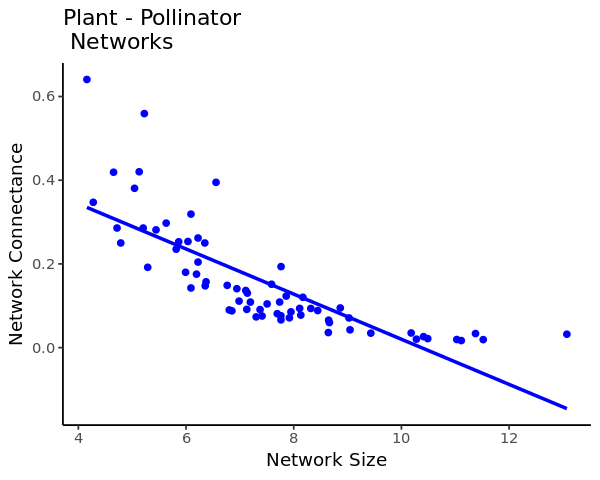

In [142]:
# plot relationship between plant-pollinator network size and connectance
options(repr.plot.width=5, repr.plot.height=4)
ggplot() +
    ggtitle("Plant - Pollinator \n Networks") +
    geom_point(data = PL_data, aes(log(size), connectance), color = "blue") +
    geom_smooth(data = PL_data, aes(log(size), connectance), method = "lm", se = FALSE, color = "blue") +
    labs(x = "Network Size", 
         y = "Network Connectance") +
theme_classic()

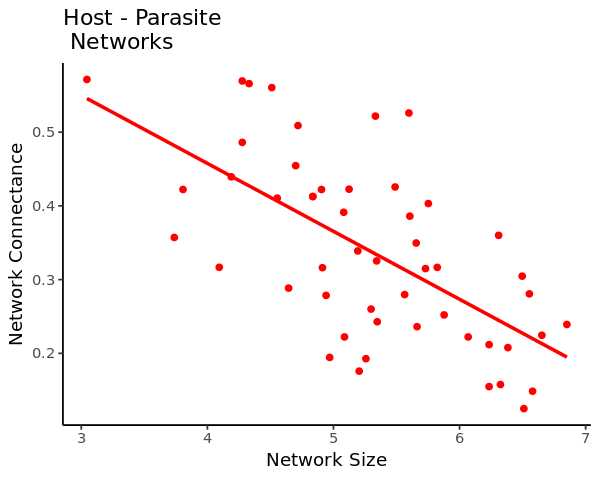

In [143]:
# plot relationship between host-parasite network size and connectance
options(repr.plot.width=5, repr.plot.height=4)
ggplot() +
    ggtitle("Host - Parasite \n Networks") +
    geom_point(data = HP_data, aes(log(size), connectance), color = "red") +
    geom_smooth(data = HP_data, aes(log(size), connectance), method = "lm", se = FALSE, color = "red") +
    labs(x = "Network Size", 
         y = "Network Connectance") +
theme_classic()

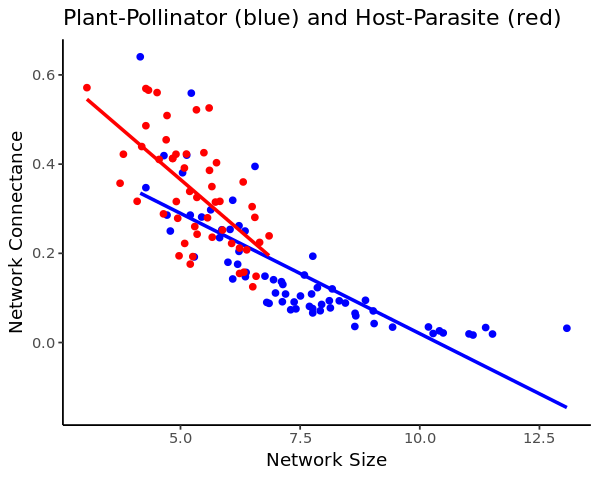

In [144]:
# plot relationship between size and connectance for both plant-pollinator and host-parasite networks
options(repr.plot.width=5, repr.plot.height=4)
ggplot() +
    ggtitle("Plant-Pollinator (blue) and Host-Parasite (red)") +
    geom_point(data = PL_data, aes(log(size), connectance), color = "blue") +
    geom_smooth(data = PL_data, aes(log(size), connectance), method = "lm", se = FALSE, color = "blue") +
    geom_point(data = HP_data, aes(log(size), connectance), color = "red") +
    geom_smooth(data = HP_data, aes(log(size), connectance), method = "lm", se = FALSE, color = "red") +
    labs(x = "Network Size", 
         y = "Network Connectance") +
theme_classic()